In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Using TensorFlow backend.
C:\Users\Unfriendly\.conda\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Unfriendly\.conda\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Unfriendly\.conda\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Unfriendly\.conda\envs\tens\lib\sit

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187601503723 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1614496276554.417
1614496276554
1425280276555
1425280276.55592
2021-02-28 07:11:16.556416+00:00
2015-03-02 07:11:16.555920+00:00
1425280276555
1425899476555
1614496276554
13 Digit Microsecond TS: 1425280276555 - 10 Digit TS: 1425280276


In [12]:
import yfinance as yf
yf_data = yf.download(tickers='BTC-USD', period='2y', interval='60m', group_by='column', auto_adjust=True, prepost=True, threads=True, proxy=None)
data = yf_data

[*********************100%***********************]  1 of 1 completed


In [13]:
#data=pd.read_csv('dataset.csv')
#data = yf.download(tickers='BTC-USD', period='max', interval='1d', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)


data.apply(pd.to_numeric, errors='coerce')

#pd.to_numeric(data, downcast='integer', errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

,Open,High,Low,Close,Volume
Datetime,,,,,
2019-03-01 00:00:00+00:00,3822.699951,3830.449951,3822.699951,3826.659912,0
2019-03-01 01:00:00+00:00,3826.310059,3833.959961,3825.399902,3833.840088,2911408
2019-03-01 02:00:00+00:00,3834.000000,3835.010010,3829.760010,3830.949951,2766284
2019-03-01 03:00:00+00:00,3831.199951,3837.449951,3831.090088,3833.750000,2322038
2019-03-01 04:00:00+00:00,3833.669922,3834.840088,3829.850098,3831.000000,1858048
...,...,...,...,...,...
2021-02-28 04:00:00+00:00,44832.472656,45081.429688,44581.945312,44700.136719,1172451328
2021-02-28 05:00:00+00:00,44660.167969,45395.320312,44530.898438,44913.929688,2058702848
2021-02-28 06:00:00+00:00,44948.695312,44978.175781,44169.253906,44623.367188,3137171456


In [14]:
df1=data['Close']
df1

Datetime
2019-03-01 00:00:00+00:00     3826.659912
2019-03-01 01:00:00+00:00     3833.840088
2019-03-01 02:00:00+00:00     3830.949951
2019-03-01 03:00:00+00:00     3833.750000
2019-03-01 04:00:00+00:00     3831.000000
                                 ...     
2021-02-28 04:00:00+00:00    44700.136719
2021-02-28 05:00:00+00:00    44913.929688
2021-02-28 06:00:00+00:00    44623.367188
2021-02-28 07:00:00+00:00    44369.152344
2021-02-28 07:09:02+00:00    44397.621094
Name: Close, Length: 17410, dtype: float64

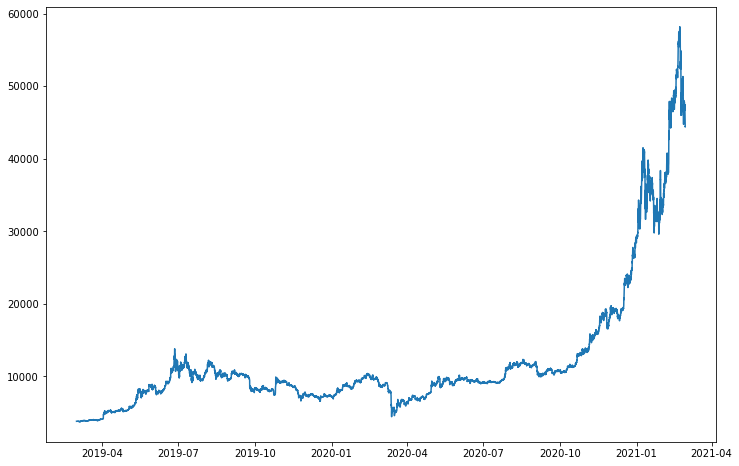

In [15]:
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

Datetime
2019-03-01 00:00:00+00:00     3826.659912
2019-03-01 01:00:00+00:00     3833.840088
2019-03-01 02:00:00+00:00     3830.949951
2019-03-01 03:00:00+00:00     3833.750000
2019-03-01 04:00:00+00:00     3831.000000
                                 ...     
2021-02-28 04:00:00+00:00    44700.136719
2021-02-28 05:00:00+00:00    44913.929688
2021-02-28 06:00:00+00:00    44623.367188
2021-02-28 07:00:00+00:00    44369.152344
2021-02-28 07:09:02+00:00    44397.621094
Name: Close, Length: 17410, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(11316, 6094)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(11215, 100)
(11215,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(5993, 100)
(5993,)


(None, None)

In [25]:
X_train.shape[1]

100

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam, Adadelta, SGD, RMSprop, Adamax

In [28]:
#opt = Adam(lr=0.0001)
#opt = Adam(lr=0.0025)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0, clipnorm=NULL, clipvalue=NULL)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0)
#opt = RMSprop(lr=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)
#opt = RMSprop(lr=0.0005, rho=0.9, momentum=0.0, epsilon=1e-07, centered=True)

#opt = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)


Train on 11215 samples, validate on 5993 samples
Epoch 1/100
11215/11215 [==============================] - 17s 1ms/step - loss: 4.1116e-04 - val_loss: 0.0018
Epoch 2/100
11215/11215 [==============================] - 16s 1ms/step - loss: 1.4973e-05 - val_loss: 0.0016
Epoch 3/100
11215/11215 [==============================] - 18s 2ms/step - loss: 1.3875e-05 - val_loss: 0.0017
Epoch 4/100
11215/11215 [==============================] - 17s 1ms/step - loss: 1.3291e-05 - val_loss: 0.0017
Epoch 5/100
11215/11215 [==============================] - 16s 1ms/step - loss: 1.2944e-05 - val_loss: 0.0017
Epoch 6/100
11215/11215 [==============================] - 16s 1ms/step - loss: 1.2097e-05 - val_loss: 0.0014
Epoch 7/100
11215/11215 [==============================] - 16s 1ms/step - loss: 1.1308e-05 - val_loss: 0.0013
Epoch 8/100
11215/11215 [==============================] - 17s 1ms/step - loss: 1.0934e-05 - val_loss: 0.0014
Epoch 9/100
11215/11215 [==============================] - 19s 2ms/ste

In [ ]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.show()

print(plt.rcParams.get('figure.figsize'))

In [ ]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

In [ ]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

#Ten Days
#while(i<10):

while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)

#Ten Days
#day_pred=np.arange(101,111)

day_pred=np.arange(101,111)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)
df2_int = len(df1)
df2_length = df2_int - 100
print(df2_int)
print(df2_length)

In [ ]:
#plt.plot(day_new,scaler.inverse_transform(df1[2205:]))

plt.plot(day_new,scaler.inverse_transform(df1[df2_length:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[2206:])

df3_length = df2_length + 1

plt.plot(df3[df3_length:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)